In [22]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from scipy import io as sio
import math
dpi = 96
scale = 0.15

In [23]:
try:
    image_in = cv.imread("data/hassaan-here-bSgg04FwCXY-unsplash.jpg")
    (h, w, d) = image_in.shape
except Exception:
    print("Err")
type(image_in), image_in.shape, image_in.dtype

(numpy.ndarray, (4000, 6000, 3), dtype('uint8'))

In [24]:
image_in = cv.cvtColor(image_in, cv.COLOR_BGR2RGB)

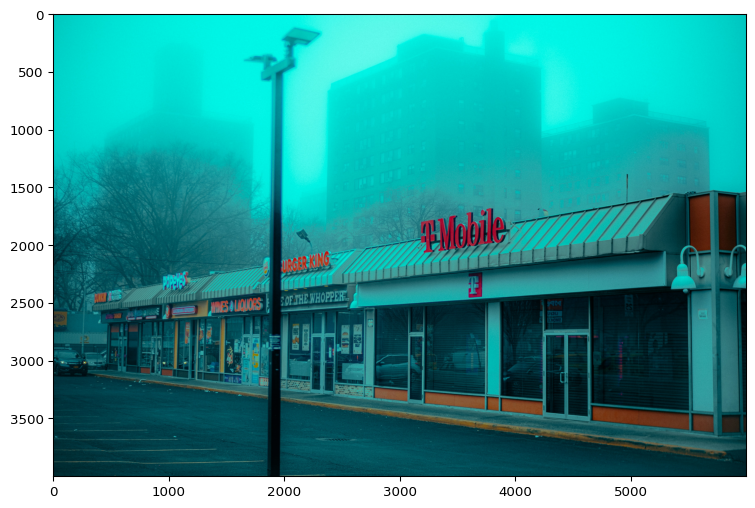

In [25]:
fig, axs = plt.subplots(figsize=(w*scale/dpi, h*scale/dpi), dpi=dpi)
plt.imshow(image_in)

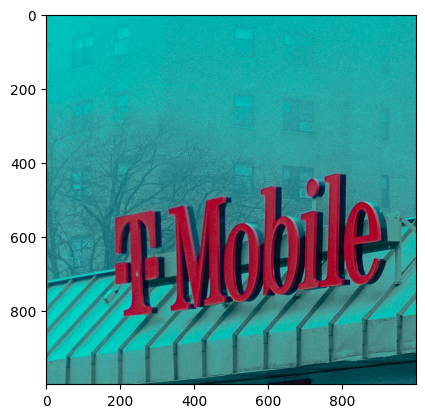

In [26]:
image_roi = image_in[1250:2250,3000:4000]
(wr,hr) = image_roi.shape[:2]
scale_roi = 1.5
plt.imshow(image_roi)

In [27]:
#Гамма коррекция
def gammaCorrection(image, gamma):
    new_image = image.copy()
    (h, w, d) = new_image.shape
    for i in range(h):
        for j in range(w):
            for component in range(d):
                corrected_component = 255 * (new_image.item(i, j, component) / 255) ** (1 / gamma)
                new_image.itemset((i, j, component), corrected_component)
    return new_image

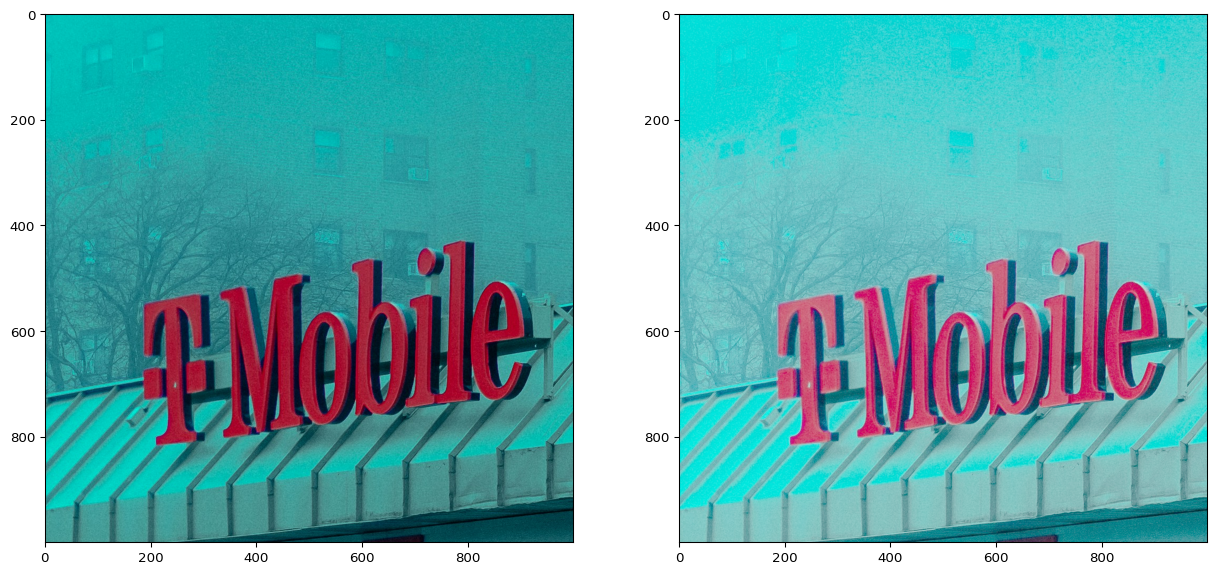

In [28]:

image_roi_corrected = gammaCorrection(image_roi, 2)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_corrected)

In [29]:
#Контрастирование
def contrasting(image, alpha, beta):
    new_image = image.copy()
    (h, w, d) = new_image.shape
    for i in range(h):
        for j in range(w):
            for component in range(d):
                corrected_component = alpha * (new_image.item(i, j, component) - 128) + 128 + beta
                new_image.itemset((i, j, component),  corrected_component)
    return new_image

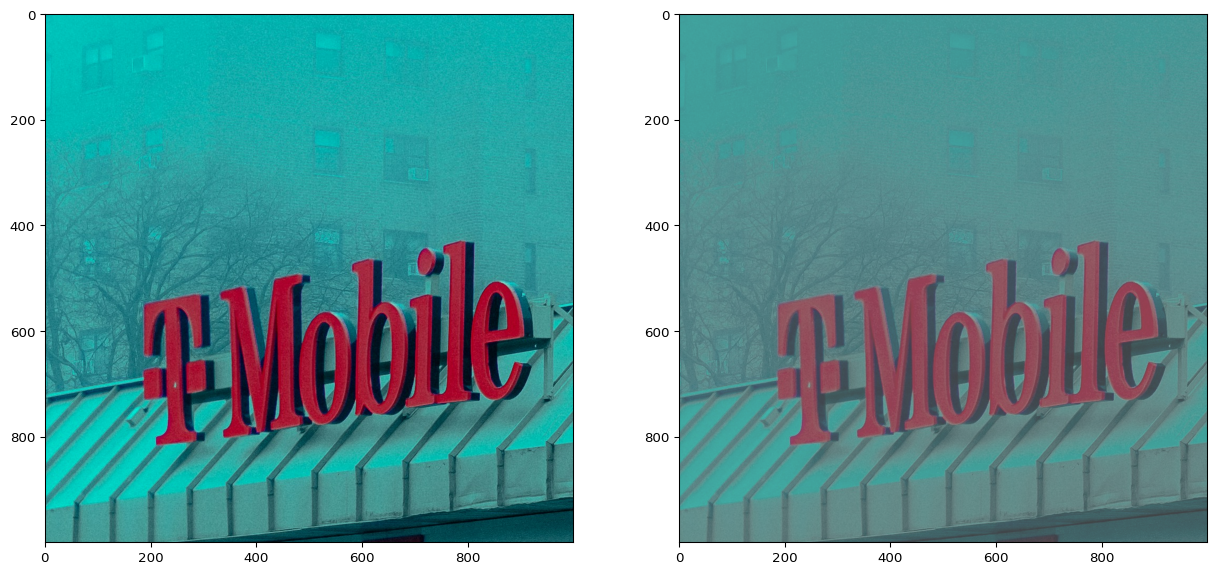

In [30]:
image_roi_contrasted = contrasting(image_roi, 0.5, 0.1)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_contrasted)

In [31]:
#Пороговая обработка
def thresholding(image, threshold):
    new_image = image.copy()
    (h, w, d) = new_image.shape
    for i in range(h):
        for j in range(w):
            median = 0
            for component in range(d):
                median += new_image.item(i, j, component)
            median = median/3
            for component in range(d):
                new_image.itemset((i, j, component),  255 if median > threshold else 0)
    return new_image

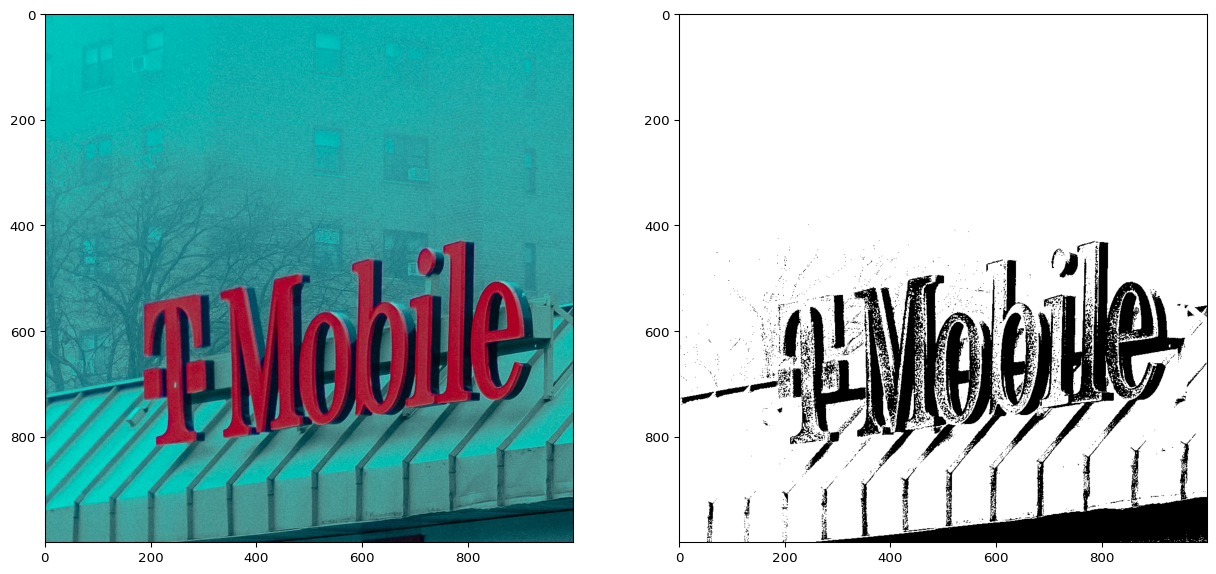

In [32]:
image_roi_thresholded = thresholding(image_roi, 80)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_thresholded)

In [33]:
#Наложение изображений
def blend(image1, alpha, image2, beta):
    (h1, w1, d1) = image1.shape
    (h2, w2, d2) = image2.shape
    min_h = min(h1,h2)
    min_w = min(w1,w2)
    min_d = min(d1,d2)
    image_out = np.zeros((min_h, min_w , 3), np.uint8)
    for i in range(min_h):
        for j in range(min_w):
            for component in range(min_d):
                blended_component = alpha * image1.item(i, j, component) + beta * image2.item(i, j, component)
                image_out.itemset((i, j, component),  blended_component)
    return image_out

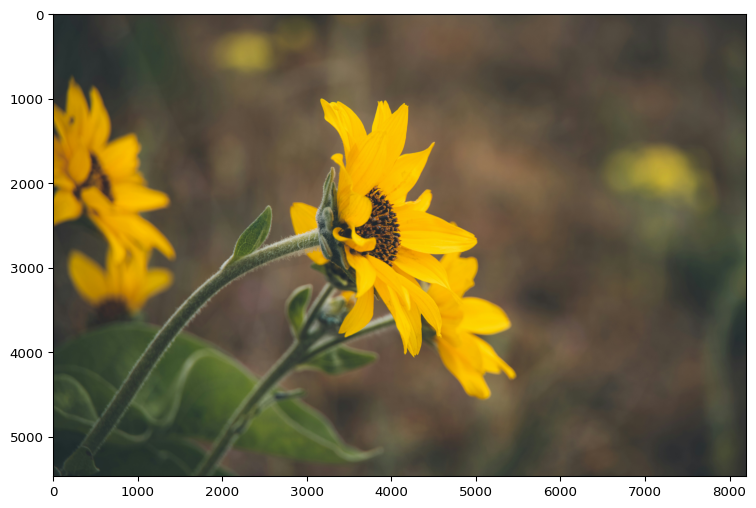

In [34]:
try:
    image1_in = cv.imread("data/eric-muhr-wnIiJHri9YQ-unsplash.jpg")
except Exception:
    print("Err")

image1_in = cv.cvtColor(image1_in, cv.COLOR_BGR2RGB)
image1_roi = image1_in[1500:2500,3000:4000]
fig, axs = plt.subplots(figsize=(w*scale/dpi, h*scale/dpi), dpi=dpi)
plt.imshow(image1_in)


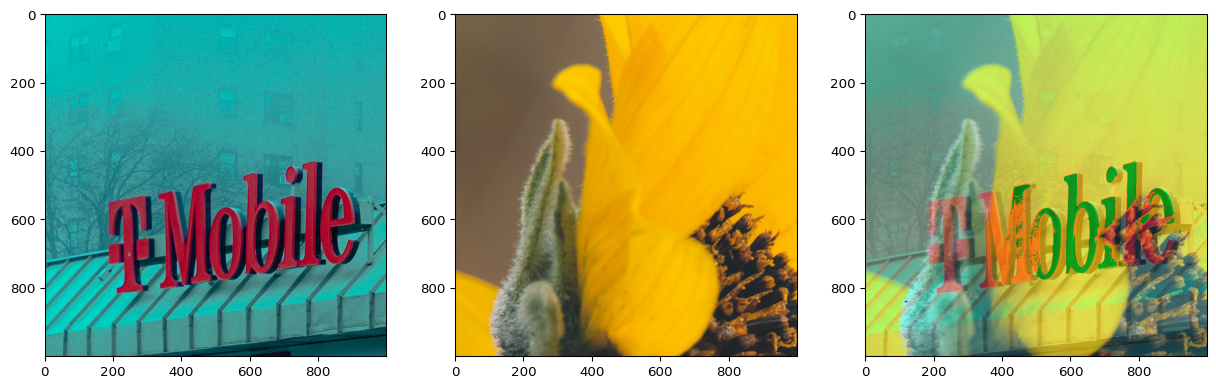

In [35]:
image_roi_blended = blend(image_roi, 0.5, image1_roi, 0.75)
fig_comp, axs_comp = plt.subplots(1, 3, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image1_roi)
axs_comp[2].imshow(image_roi_blended)

In [36]:
#Кривая коррекции
def sigmoid_function(x, L, k, x0):
    return L / (1 + math.e ** (-k * (x - x0)))

def logistic_function(x):
    return sigmoid_function(x, 1, 1, 0)

def weighted_brigtness(r, g, b):
    return (0.2126 * r) + (0.7152 * g) + (0.0722 * b)

#Вычисление значений функции, использую яркость пикселя, и применение этих значений к изображению
def tone_correction(image):
    new_image = image.copy()
    (h, w, d) = new_image.shape
    for i in range(h):
        for j in range(w):
            brightness = weighted_brigtness(new_image.item(i, j, 0), new_image.item(i, j, 1), new_image.item(i, j, 2))
            brightness = brightness / 255
            for component in range(d):
                corrected_component = 255 * (new_image.item(i, j, component) / 255 * logistic_function(brightness)) 
                new_image.itemset((i, j, component),  corrected_component)
    return new_image

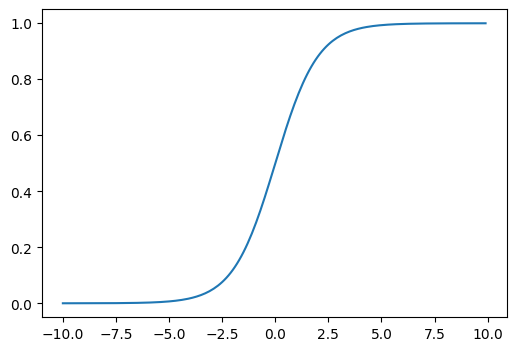

In [37]:
x = np.arange(-10, 10 , 0.1)
plt.figure(figsize=(6,4))
plt.plot(x, logistic_function(x))
plt.show()

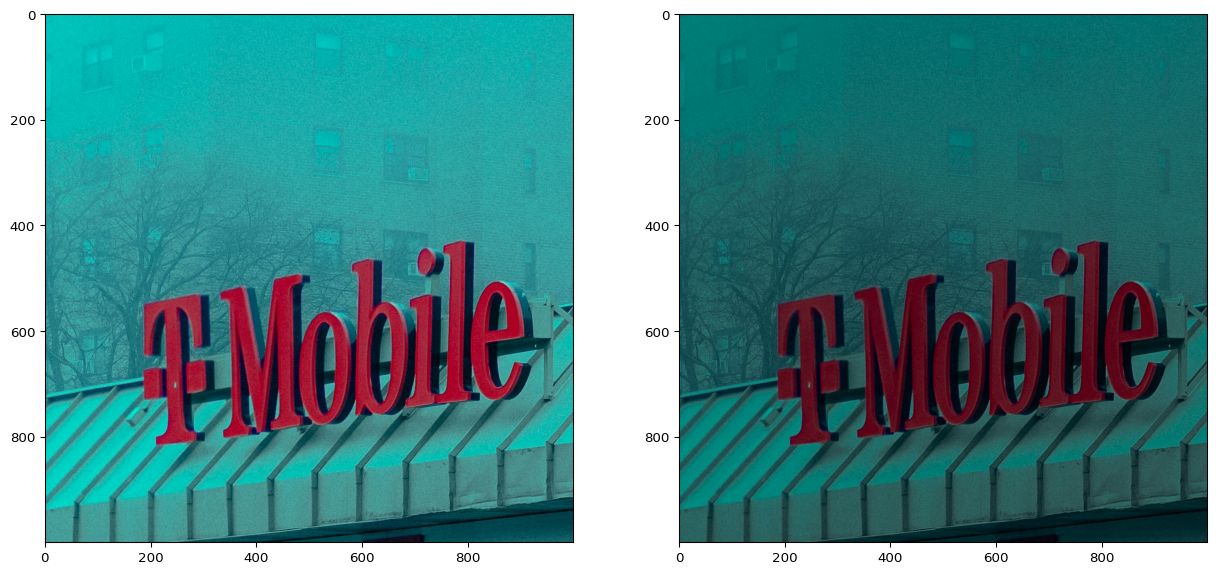

In [38]:
image_roi_tone_corrected = tone_correction(image_roi)
fig_comp, axs_comp = plt.subplots(1, 2, figsize=(wr*scale_roi/dpi, hr*scale_roi/dpi), dpi=dpi)
axs_comp[0].imshow(image_roi)
axs_comp[1].imshow(image_roi_tone_corrected)